经典网络之ShuffleNet
===

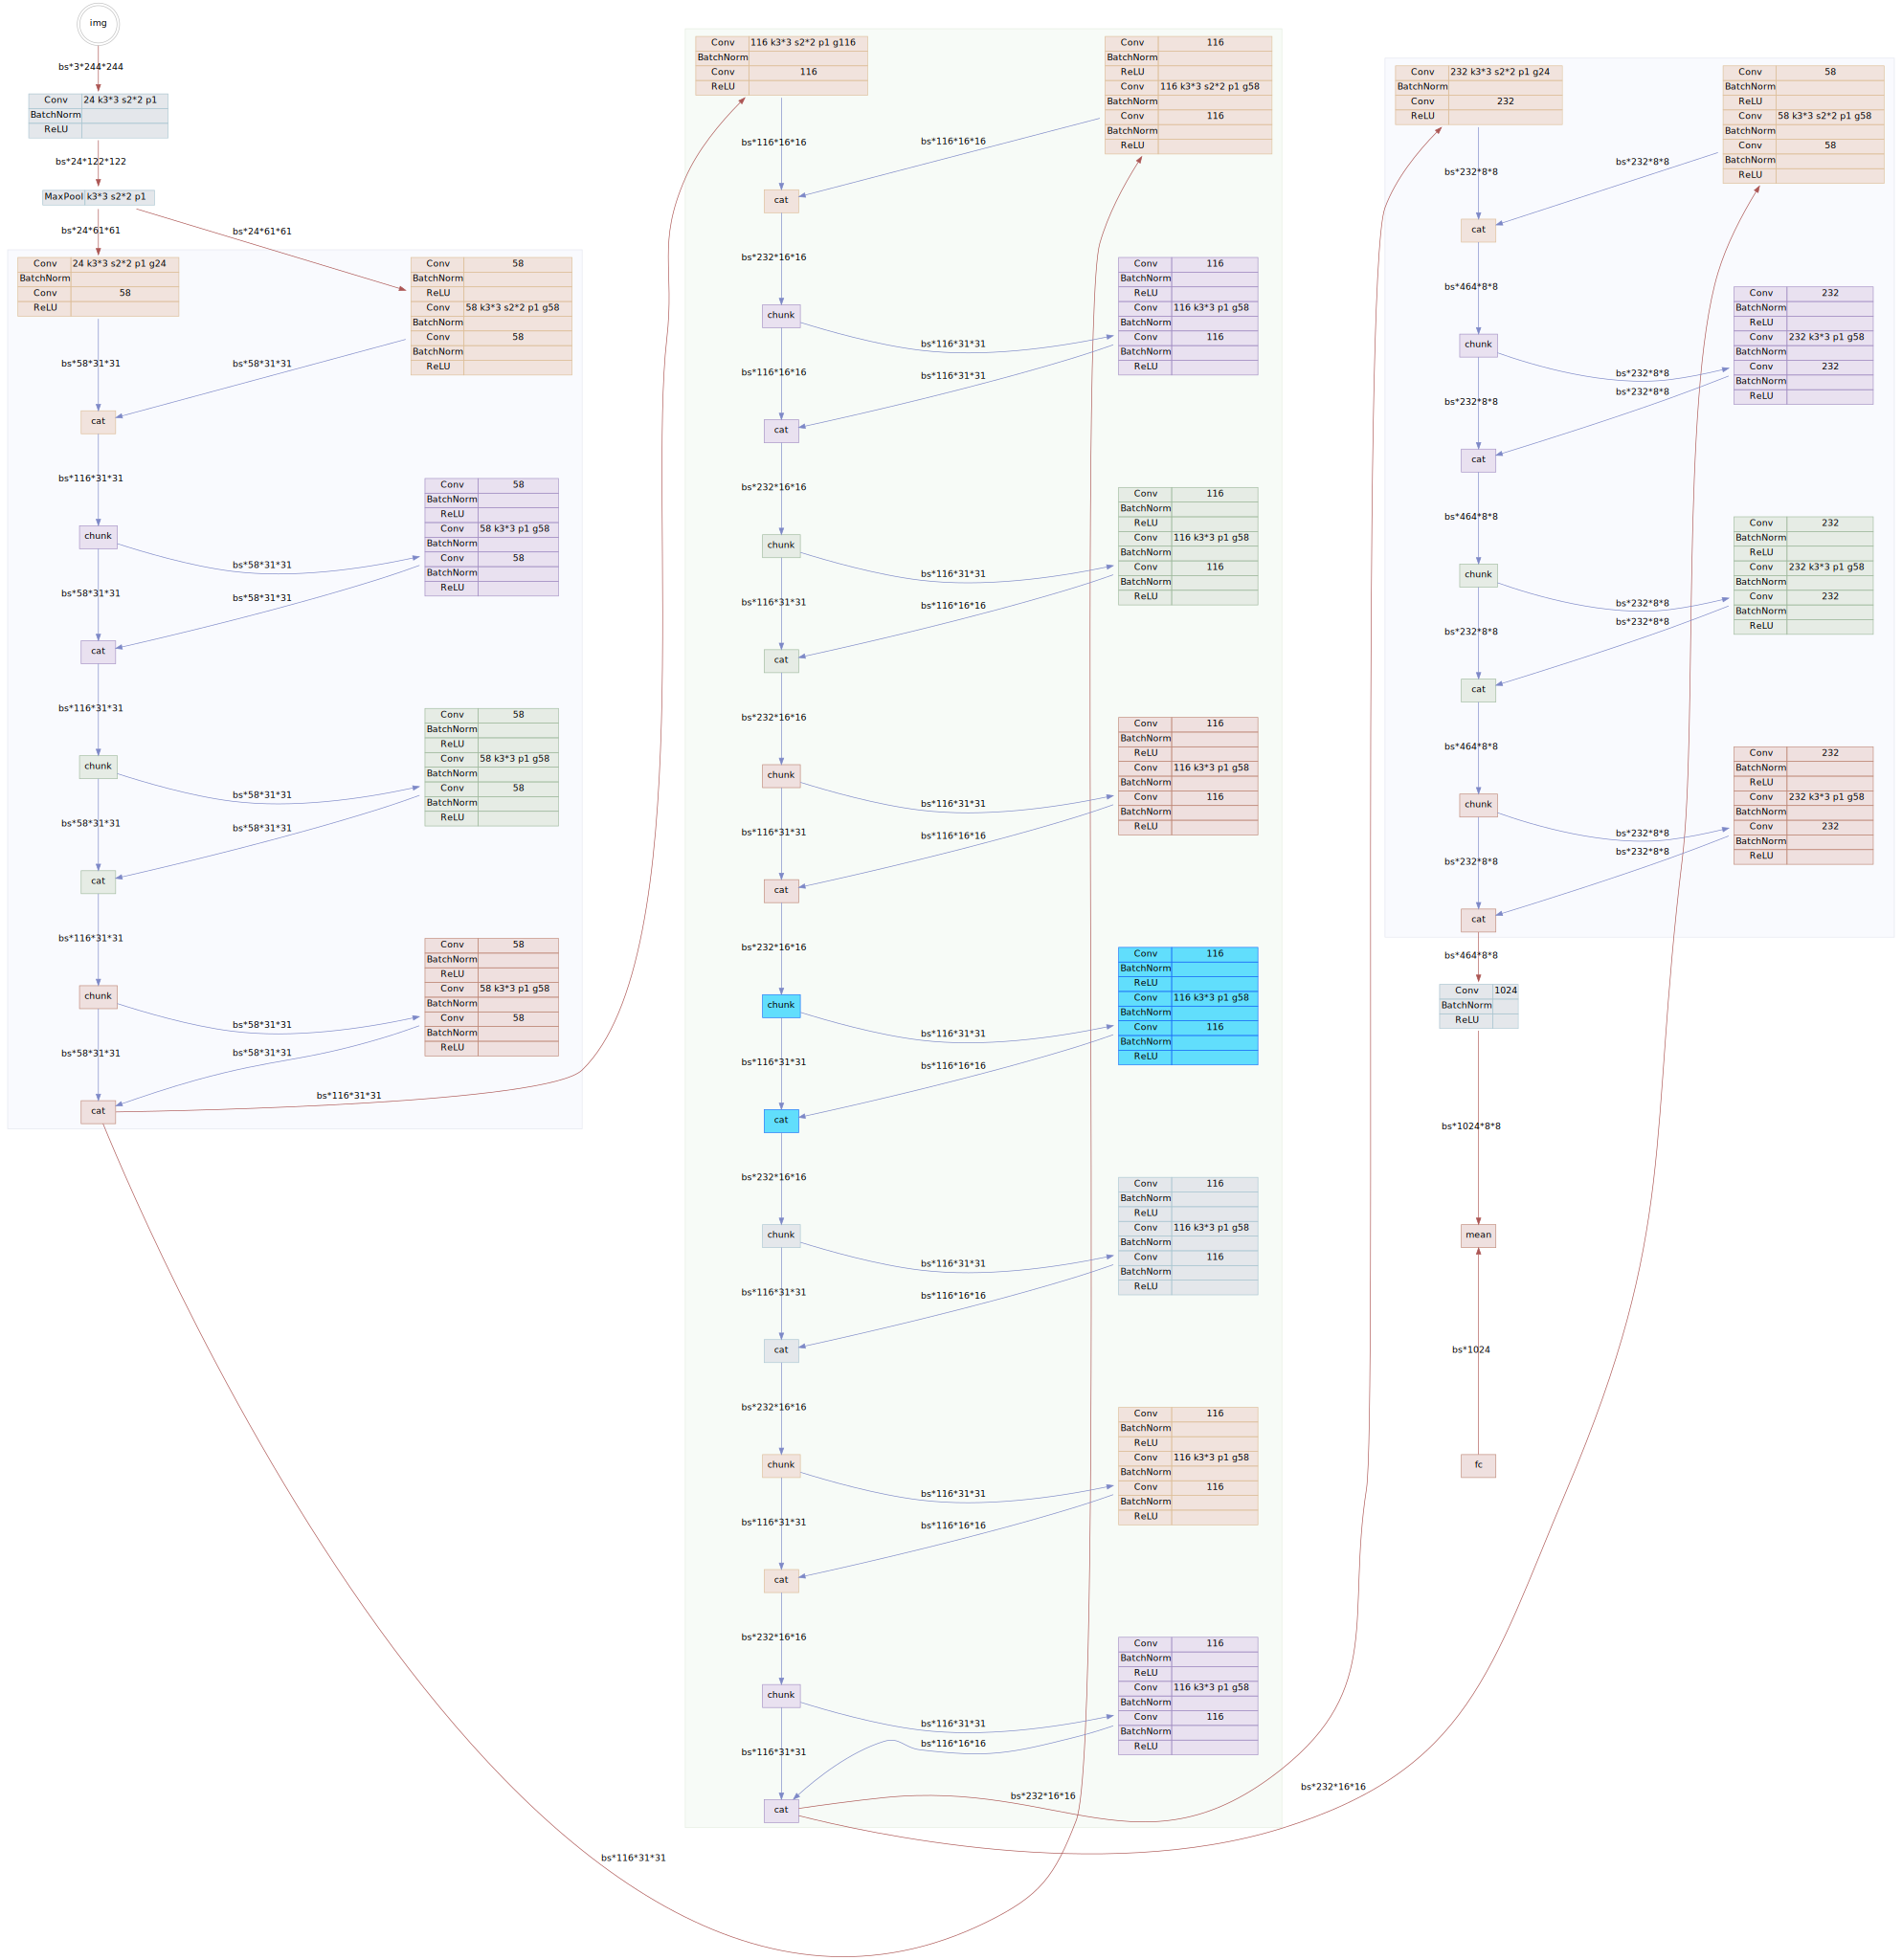

In [2]:
import graphviz

FONT_NAME = "Fira Code Retina"
graph = graphviz.Digraph(name="ShuffleNetV2", format='png', node_attr={'shape': 'plaintext'}, edge_attr = {"constraint":"false"})
graph.attr(rankdir="LR", nodesep="0.5")

graph.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)
graph.node("conv1", '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>24 k3*3 s2*2 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node("maxpool", '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>MaxPool</td><td>k3*3 s2*2 p1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.edge("img", "conv1", label="bs*3*244*244", color="#AC5553", fontname=FONT_NAME)
graph.edge("conv1", "maxpool", label="bs*24*122*122", color="#AC5553", fontname=FONT_NAME)

with graph.subgraph(name="cluster1") as sub1:
    sub1.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node("stage2_0_branch1", '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>24 k3*3 s2*2 p1 g24</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('stage2_0_branch2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>58 k3*3 s2*2 p1 g58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node("stage2_0_cat", shape="box", label="cat", color="#DDBF9A", style="filled", fillcolor="#F1E3DD", fontname=FONT_NAME)

        s.node("stage2_1_chunk", shape="box", label="chunk", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)
        s.node('stage2_1_branch2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>58 k3*3 p1 g58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node("stage2_1_cat", shape="box", label="cat", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)

        s.node("stage2_2_chunk", shape="box", label="chunk", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)
        s.node('stage2_2_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                        <tr><td>Conv</td><td>58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>58 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage2_2_cat", shape="box", label="cat", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)

        s.node("stage2_3_chunk", shape="box", label="chunk", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)
        s.node('stage2_3_branch2', '''<
                                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                                <tr><td>Conv</td><td>58</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>ReLU</td><td></td></tr>
                                <tr><td>Conv</td><td>58 k3*3 p1 g58</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>Conv</td><td>58</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>ReLU</td><td></td></tr>
                                </table>
                                >''', fontname=FONT_NAME)
        s.node("stage2_3_cat", shape="box", label="cat", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)

    sub1.node("T0", style="invis")
    sub1.edge("stage2_0_branch1", "T0", constraint="true", style="invis")
    sub1.edge("T0", "stage2_0_branch2", constraint="true", style="invis")
    sub1.edge("stage2_0_branch1", "stage2_0_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_0_branch2", "stage2_0_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)

    sub1.node("T1", style="invis")
    sub1.edge("stage2_1_chunk", "T1", constraint="true", style="invis")
    sub1.edge("T1", "stage2_1_branch2", constraint="true", style="invis")
    sub1.edge("stage2_0_cat", "stage2_1_chunk", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_1_chunk", "stage2_1_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_1_chunk", "stage2_1_branch2", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_1_branch2", "stage2_1_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)

    sub1.node("T2", style="invis")
    sub1.edge("stage2_2_chunk", "T2", constraint="true", style="invis")
    sub1.edge("T2", "stage2_2_branch2", constraint="true", style="invis")
    sub1.edge("stage2_1_cat", "stage2_2_chunk", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_2_chunk", "stage2_2_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_2_chunk", "stage2_2_branch2", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_2_branch2", "stage2_2_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)

    sub1.node("T3", style="invis")
    sub1.edge("stage2_3_chunk", "T3", constraint="true", style="invis")
    sub1.edge("T3", "stage2_3_branch2", constraint="true", style="invis")
    sub1.edge("stage2_2_cat", "stage2_3_chunk", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_3_chunk", "stage2_3_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_3_chunk", "stage2_3_branch2", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)
    sub1.edge("stage2_3_branch2", "stage2_3_cat", color="#7D88C7", label="bs*58*31*31", fontname=FONT_NAME)

graph.edge("maxpool", "stage2_0_branch1", label="bs*24*61*61", color="#AC5553", fontname=FONT_NAME)
graph.edge("maxpool", "stage2_0_branch2", label="bs*24*61*61", color="#AC5553", fontname=FONT_NAME)

with graph.subgraph(name="cluster2") as sub2:
    sub2.attr(color="#E4ECE0", bgcolor="#F7FBF7")
    with graph.subgraph() as s:
        s.node("stage3_0_branch1", '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                        <tr><td>Conv</td><td>116 k3*3 s2*2 p1 g116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node('stage3_0_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 s2*2 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_0_cat", shape="box", label="cat", color="#DDBF9A", style="filled", fillcolor="#F1E3DD",
               fontname=FONT_NAME)

        s.node("stage3_1_chunk", shape="box", label="chunk", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)
        s.node('stage3_1_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_1_cat", shape="box", label="cat", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)

        s.node("stage3_2_chunk", shape="box", label="chunk", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)
        s.node('stage3_2_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_2_cat", shape="box", label="cat", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)

        s.node("stage3_3_chunk", shape="box", label="chunk", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)
        s.node('stage3_3_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_3_cat", shape="box", label="cat", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)

        s.node("stage3_4_chunk", shape="box", label="chunk", color="#2075F8", style="filled", fillcolor="#61DEFC",
               fontname=FONT_NAME)
        s.node('stage3_4_branch2', '''<
                                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                                <tr><td>Conv</td><td>116</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>ReLU</td><td></td></tr>
                                <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>Conv</td><td>116</td></tr>
                                <tr><td>BatchNorm</td><td></td></tr>
                                <tr><td>ReLU</td><td></td></tr>
                                </table>
                                >''', fontname=FONT_NAME)
        s.node("stage3_4_cat", shape="box", label="cat", color="#2075F8", style="filled", fillcolor="#61DEFC",
               fontname=FONT_NAME)

        s.node("stage3_5_chunk", shape="box", label="chunk", color="#ACC7D2", style="filled", fillcolor="#E4E7EB",
               fontname=FONT_NAME)
        s.node('stage3_5_branch2', '''<
                            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                            <tr><td>Conv</td><td>116</td></tr>
                            <tr><td>BatchNorm</td><td></td></tr>
                            <tr><td>ReLU</td><td></td></tr>
                            <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                            <tr><td>BatchNorm</td><td></td></tr>
                            <tr><td>Conv</td><td>116</td></tr>
                            <tr><td>BatchNorm</td><td></td></tr>
                            <tr><td>ReLU</td><td></td></tr>
                            </table>
                            >''', fontname=FONT_NAME)
        s.node("stage3_5_cat", shape="box", label="cat", color="#ACC7D2", style="filled", fillcolor="#E4E7EB",
               fontname=FONT_NAME)

        s.node("stage3_6_chunk", shape="box", label="chunk", color="#DDBF9A", style="filled", fillcolor="#F1E3DD",
               fontname=FONT_NAME)
        s.node('stage3_6_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_6_cat", shape="box", label="cat", color="#DDBF9A", style="filled", fillcolor="#F1E3DD",
               fontname=FONT_NAME)

        s.node("stage3_7_chunk", shape="box", label="chunk", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)
        s.node('stage3_7_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>116 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>116</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage3_7_cat", shape="box", label="cat", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)

    sub2.node("T03", style="invis")
    sub2.edge("stage3_0_branch1", "T03", constraint="true", style="invis")
    sub2.edge("T03", "stage3_0_branch2", constraint="true", style="invis")
    sub2.edge("stage3_0_branch1", "stage3_0_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_0_branch2", "stage3_0_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T13", style="invis")
    sub2.edge("stage3_1_chunk", "T13", constraint="true", style="invis")
    sub2.edge("T13", "stage3_1_branch2", constraint="true", style="invis")
    sub2.edge("stage3_0_cat", "stage3_1_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_1_chunk", "stage3_1_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_1_chunk", "stage3_1_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_1_branch2", "stage3_1_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)

    sub2.node("T23", style="invis")
    sub2.edge("stage3_2_chunk", "T23", constraint="true", style="invis")
    sub2.edge("T23", "stage3_2_branch2", constraint="true", style="invis")
    sub2.edge("stage3_1_cat", "stage3_2_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_2_chunk", "stage3_2_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_2_chunk", "stage3_2_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_2_branch2", "stage3_2_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T33", style="invis")
    sub2.edge("stage3_3_chunk", "T33", constraint="true", style="invis")
    sub2.edge("T33", "stage3_3_branch2", constraint="true", style="invis")
    sub2.edge("stage3_2_cat", "stage3_3_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_3_chunk", "stage3_3_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_3_chunk", "stage3_3_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_3_branch2", "stage3_3_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T43", style="invis")
    sub2.edge("stage3_4_chunk", "T43", constraint="true", style="invis")
    sub2.edge("T43", "stage3_4_branch2", constraint="true", style="invis")
    sub2.edge("stage3_3_cat", "stage3_4_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_4_chunk", "stage3_4_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_4_chunk", "stage3_4_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_4_branch2", "stage3_4_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T53", style="invis")
    sub2.edge("stage3_5_chunk", "T53", constraint="true", style="invis")
    sub2.edge("T53", "stage3_5_branch2", constraint="true", style="invis")
    sub2.edge("stage3_4_cat", "stage3_5_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_5_chunk", "stage3_5_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_5_chunk", "stage3_5_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_5_branch2", "stage3_5_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T63", style="invis")
    sub2.edge("stage3_6_chunk", "T63", constraint="true", style="invis")
    sub2.edge("T63", "stage3_6_branch2", constraint="true", style="invis")
    sub2.edge("stage3_5_cat", "stage3_6_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_6_chunk", "stage3_6_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_6_chunk", "stage3_6_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_6_branch2", "stage3_6_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

    sub2.node("T73", style="invis")
    sub2.edge("stage3_7_chunk", "T73", constraint="true", style="invis")
    sub2.edge("T73", "stage3_7_branch2", constraint="true", style="invis")
    sub2.edge("stage3_6_cat", "stage3_7_chunk", color="#7D88C7", label="bs*232*16*16", fontname=FONT_NAME)
    sub2.edge("stage3_7_chunk", "stage3_7_cat", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_7_chunk", "stage3_7_branch2", color="#7D88C7", label="bs*116*31*31", fontname=FONT_NAME)
    sub2.edge("stage3_7_branch2", "stage3_7_cat", color="#7D88C7", label="bs*116*16*16", fontname=FONT_NAME)

graph.node("TS1", style="invis")
graph.edge("stage2_0_branch2", "TS1", constraint="true", style="invis")
graph.edge("TS1", "stage3_1_chunk", constraint="true", style="invis")

graph.edge("stage2_3_cat", "stage3_0_branch1", label="bs*116*31*31", color="#AC5553", fontname=FONT_NAME)
graph.edge("stage2_3_cat", "stage3_0_branch2", label="bs*116*31*31", color="#AC5553", fontname=FONT_NAME)

with graph.subgraph(name="cluster3") as sub3:
    sub3.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node("stage4_0_branch1", '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>232 k3*3 s2*2 p1 g24</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>232</td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('stage4_0_branch2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>58 k3*3 s2*2 p1 g58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node("stage4_0_cat", shape="box", label="cat", color="#DDBF9A", style="filled", fillcolor="#F1E3DD", fontname=FONT_NAME)

        s.node("stage4_1_chunk", shape="box", label="chunk", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)
        s.node('stage4_1_branch2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>232</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>232 k3*3 p1 g58</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>232</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node("stage4_1_cat", shape="box", label="cat", color="#A592C5", style="filled", fillcolor="#E9E1F0",
               fontname=FONT_NAME)

        s.node("stage4_2_chunk", shape="box", label="chunk", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)
        s.node('stage4_2_branch2', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                        <tr><td>Conv</td><td>232</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        <tr><td>Conv</td><td>232 k3*3 p1 g58</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>232</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)
        s.node("stage4_2_cat", shape="box", label="cat", color="#A2BBA0", style="filled", fillcolor="#E6ECE5",
               fontname=FONT_NAME)

        s.node("stage4_3_chunk", shape="box", label="chunk", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)
        s.node('stage4_3_branch2', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>Conv</td><td>232</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>232 k3*3 p1 g58</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>232</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node("stage4_3_cat", shape="box", label="cat", color="#C08B7B", style="filled", fillcolor="#EFE0DF",
               fontname=FONT_NAME)

    sub3.node("T04", style="invis")
    sub3.edge("stage4_0_branch1", "T04", constraint="true", style="invis")
    sub3.edge("T04", "stage4_0_branch2", constraint="true", style="invis")
    sub3.edge("stage4_0_branch1", "stage4_0_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_0_branch2", "stage4_0_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)

    sub3.node("T14", style="invis")
    sub3.edge("stage4_1_chunk", "T14", constraint="true", style="invis")
    sub3.edge("T14", "stage4_1_branch2", constraint="true", style="invis")
    sub3.edge("stage4_0_cat", "stage4_1_chunk", color="#7D88C7", label="bs*464*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_1_chunk", "stage4_1_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_1_chunk", "stage4_1_branch2", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_1_branch2", "stage4_1_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)

    sub3.node("T24", style="invis")
    sub3.edge("stage4_2_chunk", "T24", constraint="true", style="invis")
    sub3.edge("T24", "stage4_2_branch2", constraint="true", style="invis")
    sub3.edge("stage4_1_cat", "stage4_2_chunk", color="#7D88C7", label="bs*464*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_2_chunk", "stage4_2_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_2_chunk", "stage4_2_branch2", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_2_branch2", "stage4_2_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)

    sub3.node("T34", style="invis")
    sub3.edge("stage4_3_chunk", "T34", constraint="true", style="invis")
    sub3.edge("T34", "stage4_3_branch2", constraint="true", style="invis")
    sub3.edge("stage4_2_cat", "stage4_3_chunk", color="#7D88C7", label="bs*464*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_3_chunk", "stage4_3_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_3_chunk", "stage4_3_branch2", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)
    sub3.edge("stage4_3_branch2", "stage4_3_cat", color="#7D88C7", label="bs*232*8*8", fontname=FONT_NAME)

graph.node("TS2", style="invis")
graph.edge("stage3_0_branch2", "TS2", constraint="true", style="invis")
graph.edge("TS2", "stage4_0_branch1", constraint="true", style="invis")

graph.edge("stage3_7_cat", "stage4_0_branch1", label="bs*232*16*16", color="#AC5553", fontname=FONT_NAME)
graph.edge("stage3_7_cat", "stage4_0_branch2", label="bs*232*16*16", color="#AC5553", fontname=FONT_NAME)

graph.node("conv5", '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>1024</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.edge("stage4_3_cat", "conv5", label="bs*464*8*8", color="#AC5553", fontname=FONT_NAME)

graph.node("TS3", style="invis")
graph.edge("stage3_4_branch2", "TS3", constraint="true", style="invis")
graph.edge("TS3", "conv5", constraint="true", style="invis")

graph.node("mean", shape="box", label="mean", color="#C08B7B", style="filled", fillcolor="#EFE0DF", fontname=FONT_NAME)

graph.node("fc", shape="box", label="fc", color="#C08B7B", style="filled", fillcolor="#EFE0DF", fontname=FONT_NAME)
graph.edge("conv5", "mean", label="bs*1024*8*8", color="#AC5553", fontname=FONT_NAME)
graph.edge("fc", "mean", label="bs*1024", color="#AC5553", fontname=FONT_NAME)

graph.node("TS4", style="invis")
graph.edge("stage3_5_branch2", "TS4", constraint="true", style="invis")
graph.edge("TS4", "mean", constraint="true", style="invis")

graph.node("TS5", style="invis")
graph.edge("stage3_6_branch2", "TS5", constraint="true", style="invis")
graph.edge("TS5", "fc", constraint="true", style="invis")
graph


